45 45
Intercept (b): 10.2897
Slope (dz/dt): 0.0304 per second
Variance: 29.5867
Standard Deviation (σ): 5.4394


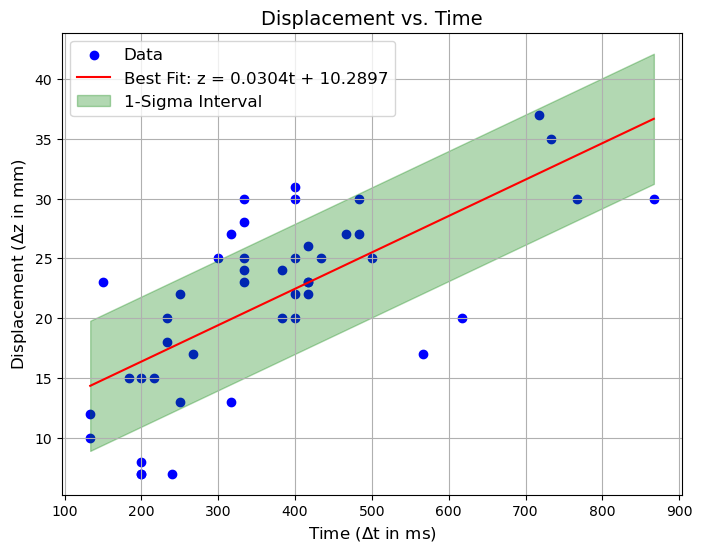

Chi-Squared: 44.0000
Degrees of Freedom: 43
Reduced Chi-Squared: 1.0233


In [23]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


t = np.array([200.0, 200.0, 200.0, 240.0, 400.0, 150.0, 483.4, 233.4, 333.4, 233.4, 716.8, 250.0, 316.7, 316.7, 333.4,
               733.5, 866.84, 400.1, 266.7, 383.4, 500.1, 250.0, 216.7, 133.36, 400.1, 400.1, 566.8, 766.8, 416.8, 416.8, 183.37, 616.8, 
                              400.1, 466.8, 333.4, 383.4, 416.75, 483.43, 300.1, 200.0, 416.8, 333.4, 433.4, 133.4, 333.4])

z = np.array([7, 7, 8, 7, 25, 23, 30, 18, 24, 20, 37, 22, 13, 27, 25, 35, 30, 31, 17, 20, 25, 
             13, 15, 12, 22, 30, 17, 30, 23, 23, 15, 20, 20, 27, 23, 24, 26, 27, 25, 15, 22, 30, 25, 10, 28])

print(len(t), len(z))

# Compute sums for least squares regression (time as independent variable)
N = len(t)
St = np.sum(t)
Sz = np.sum(z)
Stt = np.sum(t**2)
Szt = np.sum(z * t)


denominator = N * Stt - St**2
slope = (N * Szt - St * Sz) / denominator  
b = (Sz * Stt - St * Szt) / denominator

print(f"Intercept (b): {b:.4f}")
print(f"Slope (dz/dt): {slope:.4f} per second")

# Generate fitted line
t_fit = np.linspace(min(t), max(t), 500)
z_fit = slope * t_fit + b

# Compute residuals and standard deviation
z_fit_for_residuals = slope * t + b
residuals = z - z_fit_for_residuals
variance = np.var(residuals, ddof=1)  # ddof=1 for sample variance
sigma = np.sqrt(variance)

print(f"Variance: {variance:.4f}")
print(f"Standard Deviation (σ): {sigma:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(t, z, color='blue', label='Data')
plt.plot(t_fit, z_fit, color='red', label=f'Best Fit: z = {slope:.4f}t + {b:.4f}')
plt.fill_between(t_fit, z_fit - sigma, z_fit + sigma, color='green', alpha=0.3, label='1-Sigma Interval')
plt.xlabel(r'Time ($\Delta$t in ms)', fontsize=12)
plt.ylabel(r'Displacement ($\Delta$z in mm)', fontsize=12)
plt.title('Displacement vs. Time', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Compute Chi-Squared statistic
chi_squared = np.sum((residuals / sigma) ** 2)
nu = N - 2  #degrees of freedom
chi_reduced = chi_squared / nu  

print(f"Chi-Squared: {chi_squared:.4f}")
print(f"Degrees of Freedom: {nu}")
print(f"Reduced Chi-Squared: {chi_reduced:.4f}")


In [24]:
import math


mu = 1.8e-3      
rho = 1000        
g = 9.81          

# Function to calculate delta
def calculate_delta(u):
    delta = math.sqrt((3 * mu * u) / (rho * g))
    return delta


delta_result = calculate_delta(slope)

print(f"Delta for u = {slope} m/s: {delta_result:.6e} m")


Delta for u = 0.03042763515786809 m/s: 1.294185e-04 m
